In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [140]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding = 'ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [141]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [143]:
df.drop_duplicates(inplace=True)

In [144]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [145]:
df['class'] = df['v1']
df['sms'] = df['v2']
df.drop(columns=['v1','v2','Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [146]:
df

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [147]:
import re

def preprocess(text):
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text)  
    text = text.lower()  
    return text

df['sms'] = df['sms'].apply(preprocess)
df

,class,sms
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [148]:
df['class']=df['class'].map({'spam':1,'ham':0 })

In [149]:
vectorizer = TfidfVectorizer()
X= vectorizer.fit_transform(df['sms']).toarray()
Y= df['class']

In [150]:
Y.shape

(5169,)

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [152]:
Y_train.value_counts()

class
0    3627
1     508
Name: count, dtype: int64

In [153]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.9555125725338491
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [162]:
# Initialize the Sequential model
model = Sequential()

# Input Layer and First Hidden Layer (128 neurons, ReLU activation)
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

# Second Hidden Layer (64 neurons, ReLU activation)
model.add(Dense(64, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Third Hidden Layer (32 neurons, ReLU activation)
model.add(Dense(32, activation='relu'))

# Fourth Hidden Layer (16 neurons, ReLU activation)
model.add(Dense(16, activation='relu'))

# Output Layer (1 neuron, sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │       1,110,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121,025 (4.28 MB)

 Trainable params: 1,121,025 (4.28 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
# Train the model
history = model.fit(X_train, Y_train, epochs=4, batch_size=32, validation_split=0.2)

Epoch 1/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8462 - loss: 0.5039 - val_accuracy: 0.8924 - val_loss: 0.1244
Epoch 2/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9285 - loss: 0.1029 - val_accuracy: 0.9843 - val_loss: 0.0684
Epoch 3/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9977 - loss: 0.0126 - val_accuracy: 0.9819 - val_loss: 0.0648
Epoch 4/4
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9831 - val_loss: 0.0736


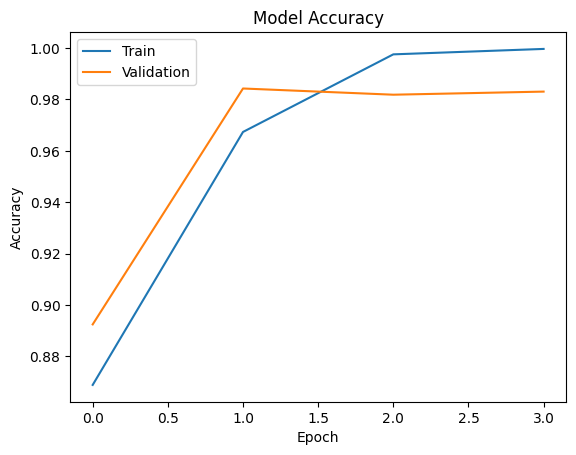

In [164]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

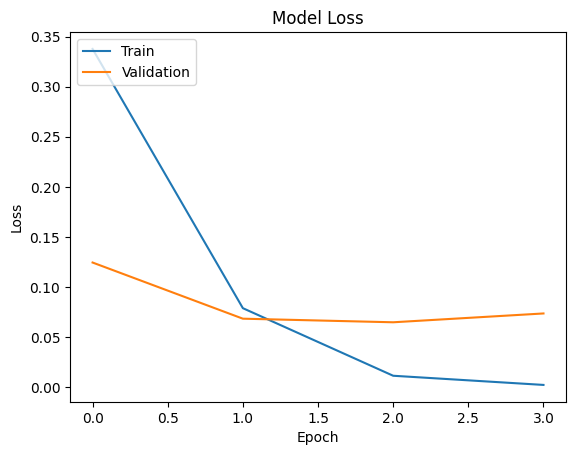

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [166]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [167]:
loaded_model = joblib.load('model.pkl')